In [88]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [89]:
startups=pd.read_csv('50_Startups.csv')
startups

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### inital analysis

In [90]:
startups.shape

(50, 5)

In [91]:
startups.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [92]:
startups.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [93]:
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### data preparations

In [94]:
startups.rename(columns={'R&D Spend':'RD_spend','Administration':'admin','Marketing Spend':'market_spend'},inplace=True)
startups

,RD_spend,admin,market_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


#### as state is not contributing in the model we can remove it my our data

In [95]:
startups.drop(axis=1,columns='State',inplace=True)

In [96]:
startups

,RD_spend,admin,market_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### ASSUMPTIONS CHECK

### lineraity

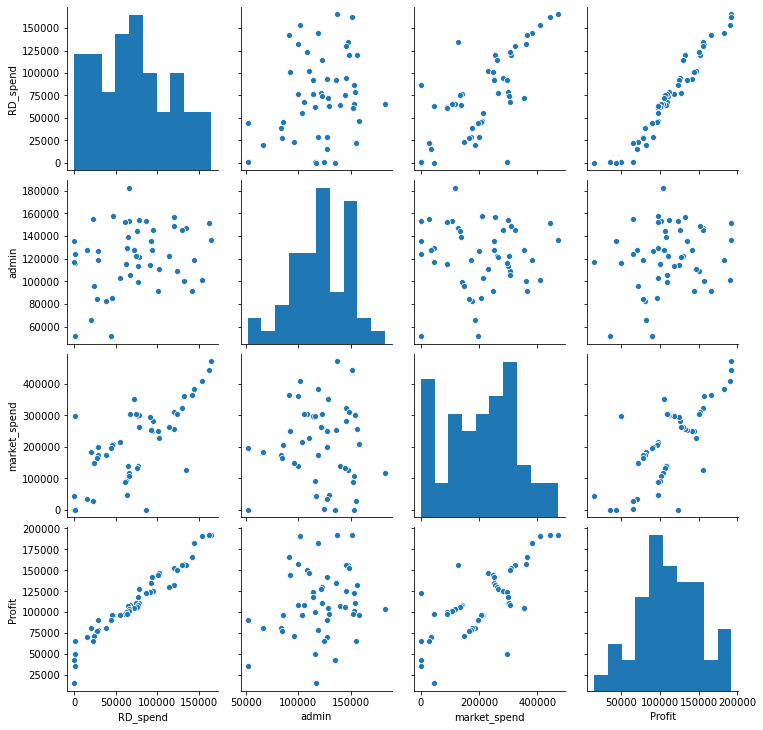

In [97]:
sns.pairplot(startups)
plt.show()

### here we see that only rd spend is linearily related and admin and market_spend are not

## 2.multicollinearilty

In [98]:
# using correlation matrix
corr_matrix=startups.corr().round(2)
corr_matrix

,RD_spend,admin,market_spend,Profit
RD_spend,1.00,0.24,0.72,0.97
admin,0.24,1.00,-0.03,0.20
market_spend,0.72,-0.03,1.00,0.75
Profit,0.97,0.20,0.75,1.00


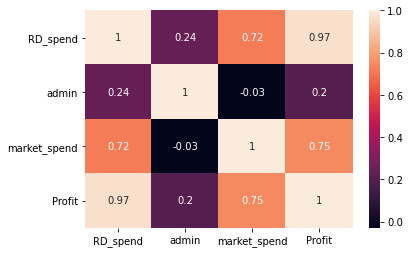

In [99]:
sns.heatmap(data=corr_matrix,annot=True)
plt.show()

### no autoregression
condition sastified

## 4. Model Building | Training | Evaluating using Statsmodels

In [100]:
#using r2 and adjusted r2

In [101]:
import statsmodels.formula.api as smf
model_1 = smf.ols('Profit~RD_spend',data = startups).fit()
print('R2 score          : ',round(model_1.rsquared,4))
print('Adjusted R2 score : ',round(model_1.rsquared_adj,4))
print('AIC value         : ',round(model_1.aic,4)) #is an estimator of prediction error 
print('BIC value         : ',round(model_1.bic,4)) ##is an estimator of prediction error 
print('SLOP AND INTERSEPT: ', model_1.params)
print('pvalues           :' ,  model_1.pvalues)

R2 score          :  0.9465
Adjusted R2 score :  0.9454
AIC value         :  1058.873
BIC value         :  1062.6971
SLOP AND INTERSEPT:  Intercept    49032.899141
RD_spend         0.854291
dtype: float64
pvalues           : Intercept    2.782697e-24
RD_spend     3.500322e-32
dtype: float64


In [102]:
import statsmodels.formula.api as smf
model_2 = smf.ols('Profit~RD_spend+admin',data = startups).fit()
print('R2 score          : ',round(model_2.rsquared,4))
print('Adjusted R2 score : ',round(model_2.rsquared_adj,4))
print('AIC value         : ',round(model_2.aic,4)) #is an estimator of prediction error 
print('BIC value         : ',round(model_2.bic,4)) ##is an estimator of prediction error
print('SLOP AND INTERSEPT: ', model_2.params)
print('pvalues           :' ,  model_2.pvalues)


R2 score          :  0.9478
Adjusted R2 score :  0.9456
AIC value         :  1059.6637
BIC value         :  1065.3998
SLOP AND INTERSEPT:  Intercept    54886.620628
RD_spend         0.862118
admin           -0.052995
dtype: float64
pvalues           : Intercept    5.695336e-12
RD_spend     2.278348e-31
admin        2.888932e-01
dtype: float64


In [103]:
import statsmodels.formula.api as smf
model_3 = smf.ols('Profit~RD_spend+admin+market_spend',data = startups).fit()
print('R2 score          : ',round(model_3.rsquared,4))
print('Adjusted R2 score : ',round(model_3.rsquared_adj,4))
print('AIC value         : ',round(model_3.aic,4)) #is an estimator of prediction error 
print('BIC value         : ',round(model_3.bic,4)) ##is an estimator of prediction error 
print('SLOP AND INTERSEPT: ', model_3.params)
print('pvalues           :' ,  model_3.pvalues)

R2 score          :  0.9507
Adjusted R2 score :  0.9475
AIC value         :  1058.7715
BIC value         :  1066.4196
SLOP AND INTERSEPT:  Intercept       50122.192990
RD_spend            0.805715
admin              -0.026816
market_spend        0.027228
dtype: float64
pvalues           : Intercept       1.057379e-09
RD_spend        2.634968e-22
admin           6.017551e-01
market_spend    1.047168e-01
dtype: float64


## r2 value always increases when input increases but adj r2 increases when contribution of input increases

## look the complete summary of model

In [104]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           3.50e-32
Time:                        11:25:50   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           7.29e-31
Time:                        11:25:51   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RD_spend       0.8621      0.030     28.589      0.000       0.801       0.923
admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 24 Oct 2021   Prob (F-statistic):           4.53e-30
Time:                        11:25:51   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_spend         0.8057      0.045     17.846      0.000       0.715       0.897
admin           -0.0268      0.051     -0.526      0.602      -0.130       0.076
market_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## model improvment technique to increase the linearity of model or contribution of model
we use log transformation technique

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
startups['log_RD_spend'] = np.log(startups['RD_spend'])
startups['log_admin'] = np.log(startups['admin'])
startups['log_market_spend'] = np.log(startups['market_spend'])

startups

,RD_spend,admin,market_spend,Profit,log_RD_spend,log_admin,log_market_spend
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849
5,131876.90,99814.71,362861.36,156991.12,11.789624,11.511071,12.801776
6,134615.46,147198.87,127716.82,156122.51,11.810178,11.899540,11.757571
7,130298.13,145530.06,323876.68,155752.60,11.777580,11.888138,12.688118
8,120542.52,148718.95,311613.29,152211.77,11.699758,11.909814,12.649518
9,123334.88,108679.17,304981.62,149759.96,11.722659,11.596155,12.628007


In [109]:
startups.drop(axis=0,index=[19,47,48,49],inplace=True)

In [110]:
startups

,RD_spend,admin,market_spend,Profit,log_RD_spend,log_admin,log_market_spend
0,165349.20,136897.80,471784.10,192261.83,12.015815,11.826990,13.064277
1,162597.70,151377.59,443898.53,191792.06,11.999034,11.927533,13.003351
2,153441.51,101145.55,407934.54,191050.39,11.941075,11.524316,12.918862
3,144372.41,118671.85,383199.62,182901.99,11.880151,11.684117,12.856311
4,142107.34,91391.77,366168.42,166187.94,11.864338,11.422911,12.810849
5,131876.90,99814.71,362861.36,156991.12,11.789624,11.511071,12.801776
6,134615.46,147198.87,127716.82,156122.51,11.810178,11.899540,11.757571
7,130298.13,145530.06,323876.68,155752.60,11.777580,11.888138,12.688118
8,120542.52,148718.95,311613.29,152211.77,11.699758,11.909814,12.649518
9,123334.88,108679.17,304981.62,149759.96,11.722659,11.596155,12.628007


In [111]:
startups2=startups.iloc[:,3:7]

In [112]:
startups2

,Profit,log_RD_spend,log_admin,log_market_spend
0,192261.83,12.015815,11.826990,13.064277
1,191792.06,11.999034,11.927533,13.003351
2,191050.39,11.941075,11.524316,12.918862
3,182901.99,11.880151,11.684117,12.856311
4,166187.94,11.864338,11.422911,12.810849
5,156991.12,11.789624,11.511071,12.801776
6,156122.51,11.810178,11.899540,11.757571
7,155752.60,11.777580,11.888138,12.688118
8,152211.77,11.699758,11.909814,12.649518
9,149759.96,11.722659,11.596155,12.628007


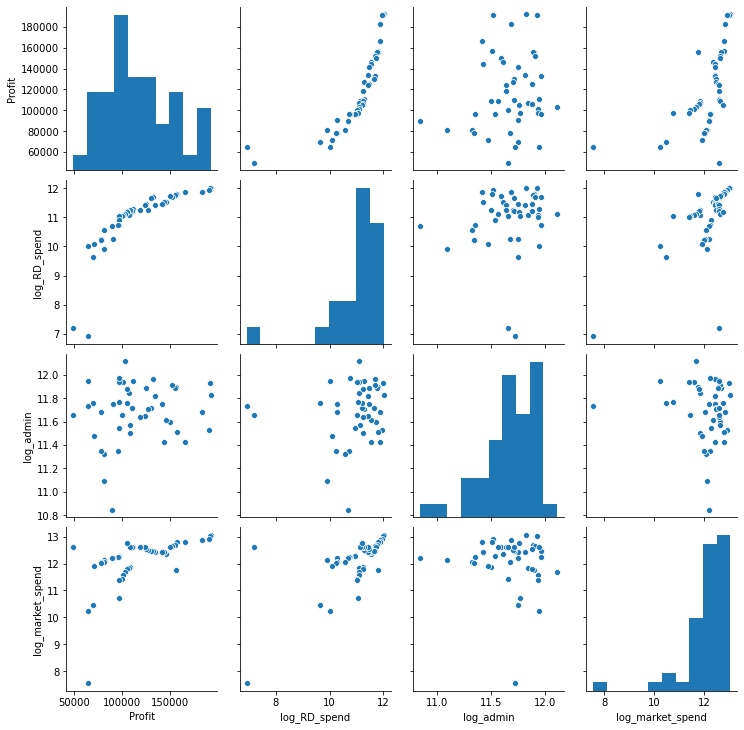

In [113]:
sns.pairplot(startups2)

## it is not working as no linearity in data

In [114]:
#understanding r2 and adjested r2


In [115]:
import statsmodels.formula.api as smf
model_4 = smf.ols('Profit~log_RD_spend',data = startups2).fit()
print('R2 score          : ',round(model_4.rsquared,4))
print('Adjusted R2 score : ',round(model_4.rsquared_adj,4))
print('AIC value         : ',round(model_4.aic,4)) #is an estimator of prediction error 
print('BIC value         : ',round(model_4.bic,4)) ##is an estimator of prediction error 
print('SLOP AND INTERSEPT: ', model_4.params)
print('pvalues           :' ,  model_4.pvalues)

R2 score          :  0.6066
Adjusted R2 score :  0.5977
AIC value         :  1055.71
BIC value         :  1059.3673
SLOP AND INTERSEPT:  Intercept      -179852.303544
log_RD_spend     27047.364753
dtype: float64
pvalues           : Intercept       1.071963e-05
log_RD_spend    1.846688e-10
dtype: float64


In [116]:
import statsmodels.formula.api as smf
model_5 = smf.ols('Profit~log_RD_spend+log_admin',data = startups2).fit()
print('R2 score          : ',round(model_5.rsquared,4))
print('Adjusted R2 score : ',round(model_5.rsquared_adj,4))
print('AIC value         : ',round(model_5.aic,4)) #is an estimator of prediction error 
print('BIC value         : ',round(model_5.bic,4)) ##is an estimator of prediction error
print('SLOP AND INTERSEPT: ', model_5.params)
print('pvalues           :' ,  model_5.pvalues)


R2 score          :  0.6087
Adjusted R2 score :  0.5905
AIC value         :  1057.4694
BIC value         :  1062.9553
SLOP AND INTERSEPT:  Intercept      -255842.025235
log_RD_spend     26810.328330
log_admin         6726.246010
dtype: float64
pvalues           : Intercept       1.263570e-01
log_RD_spend    4.703684e-10
log_admin       6.372442e-01
dtype: float64


In [117]:
import statsmodels.formula.api as smf
model_6 = smf.ols('Profit~log_RD_spend+log_admin+log_market_spend',data = startups2).fit()
print('R2 score          : ',round(model_6.rsquared,4))
print('Adjusted R2 score : ',round(model_6.rsquared_adj,4))
print('AIC value         : ',round(model_6.aic,4)) #is an estimator of prediction error 
print('BIC value         : ',round(model_6.bic,4)) ##is an estimator of prediction error 
print('SLOP AND INTERSEPT: ', model_6.params)
print('pvalues           :' ,  model_6.pvalues)

R2 score          :  0.6168
Adjusted R2 score :  0.5894
AIC value         :  1058.5087
BIC value         :  1065.8232
SLOP AND INTERSEPT:  Intercept          -328028.610134
log_RD_spend         23876.950321
log_admin            10674.924555
log_market_spend      4809.285671
dtype: float64
pvalues           : Intercept           0.077632
log_RD_spend        0.000005
log_admin           0.474399
log_market_spend    0.351842
dtype: float64


## so use of using log transformation as the value of r2 and adjust r2 decreases

## using sklearn library

## model building

In [118]:
startups_new=startups.iloc[:,:4]
startups_new

,RD_spend,admin,market_spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [119]:
x=startups_new.drop(axis=1,columns='Profit')
x

,RD_spend,admin,market_spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [120]:
y=startups[['Profit']]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


## model validation using train test split for the validation

In [121]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [122]:
#Training data
X_train.shape,y_train.shape

((36, 3), (36, 1))

In [123]:
#Test data
X_test.shape,y_test.shape

((10, 3), (10, 1))

# model training

In [124]:
from sklearn.linear_model import LinearRegression

In [125]:
linear_model_2 = LinearRegression() #Initialization
linear_model_2.fit(X_train,y_train) #Model Training

LinearRegression()

## model testing

# for train data

In [126]:
y_train_pred = linear_model_2.predict(X_train)
y_train_pred

array([[149412.17891458],
       [104163.48937205],
       [116728.34578824],
       [156062.92469178],
       [ 52965.14044032],
       [ 89681.16081035],
       [ 68173.59918106],
       [118237.79641862],
       [117779.30630835],
       [114133.54035033],
       [103315.1631629 ],
       [186336.4955927 ],
       [104721.0314186 ],
       [173100.95904789],
       [ 79306.14100003],
       [ 77420.53817714],
       [130167.96195047],
       [ 95034.67128465],
       [ 77742.07564572],
       [151108.92580504],
       [115398.53250611],
       [189896.04561659],
       [137788.59930678],
       [ 57386.60198349],
       [ 94347.81507195],
       [112926.37619849],
       [128364.49989359],
       [164250.28056245],
       [111408.51917671],
       [130404.04587672],
       [ 74888.26874712],
       [173227.76374518],
       [182039.61622867],
       [160292.60119493],
       [102592.33465112],
       [138351.29387929]])

In [127]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_pred)


48947552.58758989

In [128]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,y_train_pred)

5928.219172959758

## for test data

In [129]:
y_pred_test = linear_model_2.predict(X_test) #unseen by the model during the training time
y_pred_test

array([[ 88127.89970423],
       [ 64808.79237251],
       [159322.03903722],
       [ 74706.16993713],
       [100823.94718182],
       [117509.83556217],
       [147483.94392229],
       [100364.17491382],
       [130202.25531576],
       [103671.74048956]])

### for log transformed data

In [130]:
##  model building

In [131]:
x=startups2.drop(axis=1,columns='Profit')
x

,log_RD_spend,log_admin,log_market_spend
0,12.015815,11.826990,13.064277
1,11.999034,11.927533,13.003351
2,11.941075,11.524316,12.918862
3,11.880151,11.684117,12.856311
4,11.864338,11.422911,12.810849
5,11.789624,11.511071,12.801776
6,11.810178,11.899540,11.757571
7,11.777580,11.888138,12.688118
8,11.699758,11.909814,12.649518
9,11.722659,11.596155,12.628007


In [132]:
y=startups2[['Profit']]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


## model validation using train test split for the validation

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [134]:
#Training data
X_train.shape,y_train.shape

((36, 3), (36, 1))

In [135]:
#Test data
X_test.shape,y_test.shape

((10, 3), (10, 1))

# model training

In [136]:
from sklearn.linear_model import LinearRegression

In [137]:
linear_model_3 = LinearRegression() #Initialization
linear_model_3.fit(X_train,y_train) #Model Training

LinearRegression()

## model testing

# for train data

In [138]:
y_train_pred = linear_model_3.predict(X_train)
y_train_pred

array([[139336.73900055],
       [122167.28715211],
       [129171.21806834],
       [139465.31373385],
       [  8078.10211039],
       [115410.31633933],
       [ 92050.21665448],
       [128094.77282489],
       [127659.40245842],
       [127016.98157767],
       [118738.59091428],
       [148144.43143607],
       [122195.74252022],
       [142953.58500315],
       [100499.97764287],
       [102787.27837292],
       [132205.74855817],
       [110886.34993687],
       [102293.42572246],
       [139810.05680126],
       [127161.05213698],
       [148438.03278781],
       [134079.00676794],
       [ 27380.86708393],
       [113440.32371912],
       [125983.1108189 ],
       [132348.97792258],
       [141325.39845304],
       [124507.4761016 ],
       [132648.32338427],
       [ 96494.56035391],
       [144172.01510395],
       [145398.59852169],
       [140263.06301017],
       [123064.13980885],
       [133484.15719696]])

In [139]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_pred)

552322171.5644745

## model improvment technique to increase the linearity of model or contribution of model
we use squareroot transformation technique

In [140]:
import warnings
warnings.filterwarnings('ignore')

In [141]:
startups['sqrt_RD_spend'] = np.sqrt(startups['RD_spend'])
startups['sqrt_admin'] = np.sqrt(startups['admin'])
startups['sqrt_market_spend'] = np.sqrt(startups['market_spend'])
startups['sqrt_Profit']=np.sqrt(startups[''])

startups

KeyError: ''

In [142]:
startups_3=startups.loc[:,['Profit','sqrt_RD_spend','sqrt_admin','sqrt_market_spend']]

In [143]:
startups_3

,Profit,sqrt_RD_spend,sqrt_admin,sqrt_market_spend
0,192261.83,406.631529,369.997027,686.865416
1,191792.06,403.234051,389.072731,666.257105
2,191050.39,391.716109,318.033882,638.697534
3,182901.99,379.963696,344.487808,619.031195
4,166187.94,376.971272,302.310718,605.118517
5,156991.12,363.148592,315.934661,602.379747
6,156122.51,366.899796,383.665049,357.374901
7,155752.60,360.968323,381.484023,569.101643
8,152211.77,347.192339,385.640960,558.223333
9,149759.96,351.190660,329.665239,552.251410


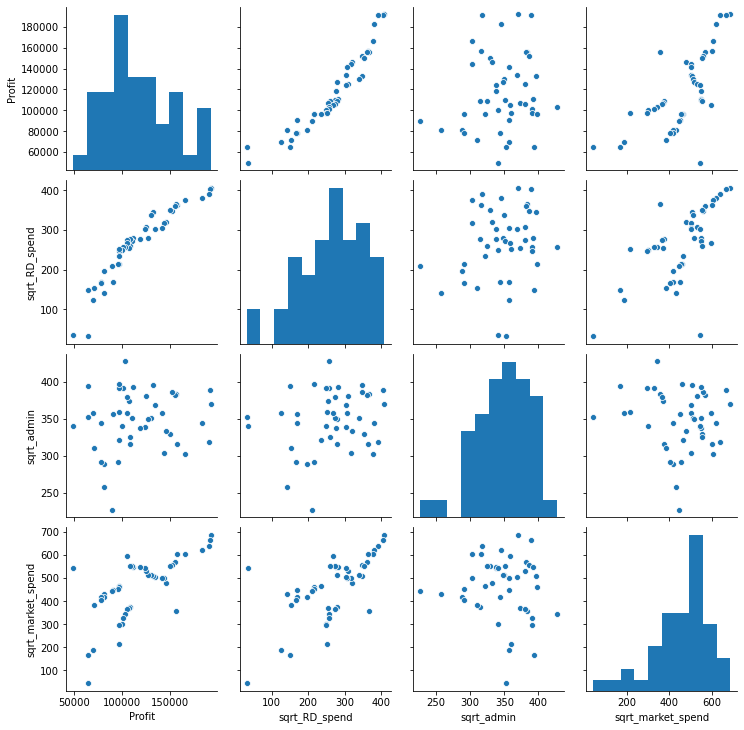

In [144]:
sns.pairplot(startups_3)
plt.show()

In [145]:
corr_matrix=startups_3.corr().round(2)

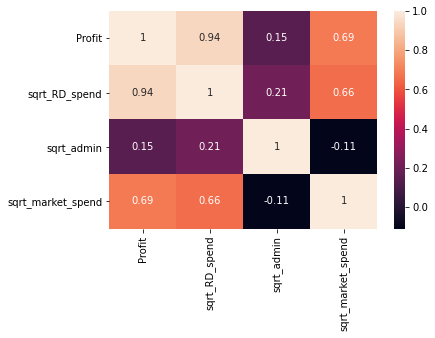

In [146]:
sns.heatmap(data=corr_matrix,annot=True)

## 4. Model Building | Training | Evaluating using Statsmodels

In [147]:
#using r2 and adjusted r2

In [148]:
import statsmodels.formula.api as smf
model_7 = smf.ols('Profit~sqrt_RD_spend',data = startups_3).fit()
print('R2 score          : ',round(model_7.rsquared,4))
print('Adjusted R2 score : ',round(model_7.rsquared_adj,4))
print('AIC value         : ',round(model_7.aic,4)) #is an estimator of prediction error 
print('BIC value         : ',round(model_7.bic,4)) ##is an estimator of prediction error 
print('SLOP AND INTERSEPT: ', model_7.params)
print('pvalues           :' ,  model_7.pvalues)

R2 score          :  0.8813
Adjusted R2 score :  0.8786
AIC value         :  1000.5951
BIC value         :  1004.2524
SLOP AND INTERSEPT:  Intercept        16802.02977
sqrt_RD_spend      377.79378
dtype: float64
pvalues           : Intercept        6.225137e-03
sqrt_RD_spend    5.524010e-22
dtype: float64


In [149]:
import statsmodels.formula.api as smf
model_8 = smf.ols('Profit~sqrt_RD_spend+sqrt_admin',data = startups_3).fit()
print('R2 score          : ',round(model_8.rsquared,4))
print('Adjusted R2 score : ',round(model_8.rsquared_adj,4))
print('AIC value         : ',round(model_8.aic,4)) #is an estimator of prediction error 
print('BIC value         : ',round(model_8.bic,4)) ##is an estimator of prediction error
print('SLOP AND INTERSEPT: ', model_8.params)
print('pvalues           :' ,  model_8.pvalues)


R2 score          :  0.8833
Adjusted R2 score :  0.8779
AIC value         :  1001.7986
BIC value         :  1007.2845
SLOP AND INTERSEPT:  Intercept        30169.296112
sqrt_RD_spend      381.599656
sqrt_admin         -41.438152
dtype: float64
pvalues           : Intercept        7.444163e-02
sqrt_RD_spend    1.803200e-21
sqrt_admin       3.909440e-01
dtype: float64


In [150]:
import statsmodels.formula.api as smf
model_9 = smf.ols('Profit~sqrt_RD_spend+sqrt_admin+sqrt_market_spend',data = startups_3).fit()
print('R2 score          : ',round(model_9.rsquared,4))
print('Adjusted R2 score : ',round(model_9.rsquared_adj,4))
print('AIC value         : ',round(model_9.aic,4)) #is an estimator of prediction error 
print('BIC value         : ',round(model_9.bic,4)) ##is an estimator of prediction error 
print('SLOP AND INTERSEPT: ', model_9.params)
print('pvalues           :' ,  model_9.pvalues)

R2 score          :  0.89
Adjusted R2 score :  0.8821
AIC value         :  1001.0894
BIC value         :  1008.4039
SLOP AND INTERSEPT:  Intercept            15749.179941
sqrt_RD_spend          348.879515
sqrt_admin             -15.066424
sqrt_market_spend       30.420961
dtype: float64
pvalues           : Intercept            4.009121e-01
sqrt_RD_spend        5.197873e-15
sqrt_admin           7.637197e-01
sqrt_market_spend    1.179392e-01
dtype: float64


## r2 value always increases when input increases but adj r2 increases when contribution of input increases

## using sklearn library

## model building

In [151]:
x=startups_3.drop(axis=1,columns='Profit')
x

,sqrt_RD_spend,sqrt_admin,sqrt_market_spend
0,406.631529,369.997027,686.865416
1,403.234051,389.072731,666.257105
2,391.716109,318.033882,638.697534
3,379.963696,344.487808,619.031195
4,376.971272,302.310718,605.118517
5,363.148592,315.934661,602.379747
6,366.899796,383.665049,357.374901
7,360.968323,381.484023,569.101643
8,347.192339,385.640960,558.223333
9,351.190660,329.665239,552.251410


In [152]:
y=startups_3[['Profit']]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


## model validation using train test split for the validation

In [153]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=12)

In [154]:
#Training data
X_train.shape,y_train.shape

((36, 3), (36, 1))

In [155]:
#Test data
X_test.shape,y_test.shape

((10, 3), (10, 1))

# model training

In [156]:
from sklearn.linear_model import LinearRegression

In [157]:
linear_model_4 = LinearRegression() #Initialization
linear_model_4.fit(X_train,y_train) #Model Training

LinearRegression()

## model testing

# for train data

In [158]:
y_train_pred = linear_model_4.predict(X_train)
y_train_pred

array([[147525.17070567],
       [110787.4242372 ],
       [124486.33896557],
       [152369.6662817 ],
       [ 23925.64613039],
       [ 98873.83842673],
       [ 68126.90662274],
       [124806.87490828],
       [124747.49159549],
       [122465.889985  ],
       [107596.64635472],
       [172069.50765429],
       [111674.66421089],
       [163787.39171239],
       [ 83299.449893  ],
       [ 83113.5608503 ],
       [134371.20863979],
       [101747.21750999],
       [ 82828.30541173],
       [149337.98874767],
       [122950.92063243],
       [174362.93638194],
       [138985.34950549],
       [ 37527.03200971],
       [101628.74007574],
       [118689.20457959],
       [132660.02107495],
       [158287.20379366],
       [119343.15542796],
       [134055.6404722 ],
       [ 77420.53236541],
       [163900.30602667],
       [169432.1630045 ],
       [151929.85827793],
       [110370.89591174],
       [139669.49161653]])

In [159]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_train_pred)


150288037.10232922

In [160]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_train,y_train_pred)

9519.827312598567

## for test data

In [161]:
y_pred_test = linear_model_2.predict(X_test) #unseen by the model during the training time
y_pred_test

array([[60931.86870279],
       [60866.53080668],
       [61059.50663696],
       [60890.6805521 ],
       [60961.63536552],
       [60994.73362832],
       [61042.86016203],
       [60964.14885309],
       [61016.24420509],
       [60969.13144365]])

## standard scaler

In [167]:
x=startups_new.drop(axis=0,columns='Profit')
x

,RD_spend,admin,market_spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [169]:
y=startups[['Profit']]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [171]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_x = std_scaler.fit_transform(x)
print(scaled_x)

[[ 2.01554692  0.5637599   2.21023724]
 [ 1.95188101  1.10976069  1.95700798]
 [ 1.74001941 -0.78437822  1.63041849]
 [ 1.53017295 -0.12350029  1.40580033]
 [ 1.47776236 -1.15217165  1.25113976]
 [ 1.24104409 -0.83456125  1.22110831]
 [ 1.30441059  0.95219042 -0.91424256]
 [ 1.20451353  0.88926329  0.86708788]
 [ 0.97878218  1.00950927  0.75572386]
 [ 1.04339354 -0.50030211  0.69550158]
 [ 0.54772265 -0.42809396  0.00697301]
 [ 0.51900484 -1.13713228  0.19389297]
 [ 0.36147226  0.20261661  0.19475467]
 [ 0.31817157  0.51086606  0.22041298]
 [ 0.96491567  1.30470352  0.25535663]
 [ 0.83951291  0.02525654  0.30315282]
 [-0.00528967 -0.01317862  0.32648949]
 [ 0.37983067  0.87220127  0.49202048]
 [ 0.31254357 -0.29303675  0.60412796]
 [-0.04599629 -0.30466922  0.63813545]
 [ 0.00341878  1.20010251  0.64787774]
 [-0.09827338  0.03151264  0.68040566]
 [-0.24779583 -0.61071578  0.69356832]
 [-0.02771331 -0.85467345 -0.79747897]
 [-0.31415323  0.66388764 -0.8212003 ]
 [-0.06739928  0.83669562

In [172]:
scaled_x = pd.DataFrame(data = scaled_x,columns=['RD_spend','admin','market_spend'])
scaled_x

,RD_spend,admin,market_spend
0,2.015547,0.563760,2.210237
1,1.951881,1.109761,1.957008
2,1.740019,-0.784378,1.630418
3,1.530173,-0.123500,1.405800
4,1.477762,-1.152172,1.251140
5,1.241044,-0.834561,1.221108
6,1.304411,0.952190,-0.914243
7,1.204514,0.889263,0.867088
8,0.978782,1.009509,0.755724
9,1.043394,-0.500302,0.695502


In [173]:
scaled_x.mean(),scaled_x.std()

(RD_spend       -9.654113e-18
 admin           8.205996e-16
 market_spend   -4.682245e-16
 dtype: float64,
 RD_spend        1.01105
 admin           1.01105
 market_spend    1.01105
 dtype: float64)

In [175]:
from sklearn.linear_model import LinearRegression
linear_model_5= LinearRegression()
linear_model_5.fit(scaled_x,y)

LinearRegression()

In [176]:
y_predicted = linear_model_5.predict(scaled_x)
y_predicted

array([[188542.8230628 ],
       [184994.62678374],
       [180214.90791276],
       [171634.1734915 ],
       [171190.59125946],
       [162668.81166146],
       [157412.09273868],
       [157935.13591697],
       [149925.42607178],
       [154381.59493502],
       [136158.68492535],
       [136724.17370809],
       [129293.21181254],
       [127400.52166174],
       [147926.66860343],
       [145861.87995931],
       [117599.69951904],
       [129469.65085564],
       [129310.4892184 ],
       [117359.46320106],
       [116633.9373571 ],
       [115155.86574365],
       [111188.78105914],
       [115808.45242181],
       [103710.05841339],
       [111645.78404533],
       [114343.36306294],
       [101808.29936342],
       [103034.95633614],
       [102174.68520376],
       [ 99217.46993946],
       [101587.7677164 ],
       [100259.97404795],
       [ 89845.37125579],
       [ 93803.10685529],
       [ 77702.7026391 ],
       [ 94164.40969467],
       [ 74526.89333457],
       [ 875

In [177]:
error = y - y_predicted
error

,Profit
0,3719.006937
1,6797.433216
2,10835.482087
3,11267.816509
4,-5002.651259
5,-5677.691661
6,-1289.582739
7,-2182.535917
8,2286.343928
9,-4621.634935


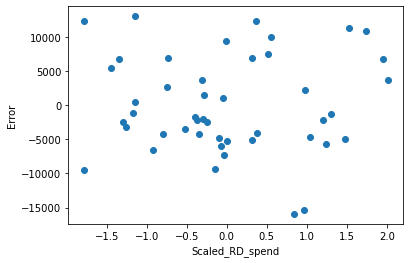

In [178]:
plt.scatter(x =scaled_x['RD_spend'],y = error)
plt.xlabel('Scaled_RD_spend')
plt.ylabel('Error')
plt.show()

In [181]:
mean_squared_error(y,y_predicted)

49559086.416561596